# Part I - (Prosper Loan Data)

### by Tejas

### Introduction

I will be exploring the loan data of over 100 thousand loans collected over a specific period of time. This exploration will help me answer some vital questions such as:

1. What factors affects the outcome of the loan status.

2. What affects the borrower's APR and interest rate.

3. Does Prosper score affect the BorrowerRate and by how much.

4. Is the BorrowerState, Occupation, EmploymentStatus, DebtToIncomeRatio and IsBorrowerHomeOwner have any effect on LoanStatus, BorrowerRate and ProsperRating.

## Preliminary Wrangling

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
 
%matplotlib inline

In [2]:
import os
os.chdir('C:\\Users\\Tejas\\Desktop\\Data Science\\Projects\\Loan Analysis\\Dataset')

In [3]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 0CE4-64E6

 Directory of C:\Users\Tejas\Desktop\Data Science\Projects\Loan Analysis\Dataset

14-12-2022  11:11    <DIR>          .
14-12-2022  11:09    <DIR>          ..
14-12-2022  11:11        86,471,101 prosperLoanData.csv
               1 File(s)     86,471,101 bytes
               2 Dir(s)  25,766,215,680 bytes free


In [4]:
df = pd.read_csv('prosperLoanData.csv')

In [5]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
df['ProsperRating (Alpha)'].unique()

array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [8]:
df.shape

(113937, 81)

#### The dataset contains 113937 data with 81 variabbles

#### What is/are the main feature(s) of interest in your dataset?

The main features of interest are:

- LoanStatus
- CreditGrade
- BorrowerAPR
- BorrowerRate
- LenderYield
- EstimatedLoss
- EstimatedReturn
- ProsperRating
- ProsperScore

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

These features will be used in investigating the features of interest:

- Term
- EstimatedEffectiveYield
- ClosedDate
- BorrowerAPR
- BorrowerRate
- LenderYield
- EstimatedEffectiveYield
- EstimatedLoss
- EstimatedReturn
- ProsperRating (numeric)
- ProsperRating (Alpha)
- ProsperScore
- ListingCategory
- BorrowerState
- Occupation
- EmploymentStatus
- EmploymentStatusDuration
- IsBorrowerHomeowner
- CurrentlyInGroup
- GroupKey
- DebtToIncomeRatio
- IncomeRange
- StatedMonthlyIncome
- TotalProsperLoans
- LoanCurrentDaysDelinquent
- LoanFirstDefaultedCycleNumber
- LoanMonthsSinceOrigination
- LoanOriginalAmount
- LoanOriginationDate
- LoanOriginationQuarter
- LoanCurrentDaysDelinquent
- MonthlyLoanPayment


### Data Wrangling

First we will pick out only features of interest and then do a quick clean up by removing or replacing null values in the dataset and then change the datatypes of some to the right datatype. This will ensure quality analysis.

In [9]:
# features of interest

features = ['CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination', 'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter', 'MonthlyLoanPayment', 'LoanCurrentDaysDelinquent']
newdf = df.copy()

In [10]:
newdf = newdf[features]

In [11]:
newdf.CreditGrade.value_counts()

C     5649
D     5153
B     4389
AA    3509
HR    3508
A     3315
E     3289
NC     141
Name: CreditGrade, dtype: int64

In [12]:
newdf['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

In [13]:
newdf.isna().sum()

CreditGrade                       84984
Term                                  0
LoanStatus                            0
ClosedDate                        58848
BorrowerAPR                          25
BorrowerRate                          0
LenderYield                           0
EstimatedEffectiveYield           29084
EstimatedLoss                     29084
EstimatedReturn                   29084
ProsperRating (numeric)           29084
ProsperRating (Alpha)             29084
ProsperScore                      29084
ListingCategory (numeric)             0
BorrowerState                      5515
Occupation                         3588
EmploymentStatus                   2255
EmploymentStatusDuration           7625
IsBorrowerHomeowner                   0
CurrentlyInGroup                      0
GroupKey                         100596
DebtToIncomeRatio                  8554
IncomeRange                           0
StatedMonthlyIncome                   0
TotalProsperLoans                 91852


In [14]:
# Replace missing data


newdf['CreditGrade'] = newdf['CreditGrade'].fillna('None')
newdf['GroupKey'] = newdf['GroupKey'].fillna('None')
newdf['Occupation'] = newdf['Occupation'].fillna('None')
newdf['ClosedDate'] = newdf['ClosedDate'].fillna('None')
newdf['EmploymentStatus'] = newdf['EmploymentStatus'].fillna('Not available')
newdf['BorrowerState'] = newdf['BorrowerState'].fillna('NA')
newdf['TotalProsperLoans'] = newdf['TotalProsperLoans'].fillna(0)
newdf['LoanFirstDefaultedCycleNumber'] = newdf['LoanFirstDefaultedCycleNumber'].fillna(0)
newdf['DebtToIncomeRatio'] = newdf['DebtToIncomeRatio'].fillna(0)
newdf['EmploymentStatusDuration'] = newdf['EmploymentStatusDuration'].fillna(0)
newdf['ProsperRating (numeric)'] = newdf['ProsperRating (numeric)'].fillna(0)
newdf['ProsperRating (Alpha)'] = newdf['ProsperRating (Alpha)'].fillna('0')
newdf['ProsperScore'] = newdf['ProsperScore'].fillna(0)
newdf['EstimatedEffectiveYield'] = newdf['EstimatedEffectiveYield'].fillna(0)
newdf['EstimatedLoss'] = newdf['EstimatedLoss'].fillna(0)
newdf['EstimatedReturn'] = newdf['EstimatedReturn'].fillna(0)

In [15]:
#Remove the rest of the missing data

newdf = newdf[newdf['LoanStatus'].notna()]
newdf = newdf[newdf['BorrowerAPR'].notna()]

DataFrame.notna()
- Return a boolean object where non-missing values get mapped to True and missing values get mapped to False

In [16]:
# Chamge the datatypes to the right format

newdf.TotalProsperLoans = newdf.TotalProsperLoans.astype(int)
newdf.LoanFirstDefaultedCycleNumber = newdf.LoanFirstDefaultedCycleNumber.astype(int)
newdf.EmploymentStatusDuration = newdf.EmploymentStatusDuration.astype(int)
newdf.ProsperScore = newdf.ProsperScore.astype(int)
newdf['ProsperRating (numeric)'] = newdf['ProsperRating (numeric)'].astype(int)

In [17]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CreditGrade                    113912 non-null  object 
 1   Term                           113912 non-null  int64  
 2   LoanStatus                     113912 non-null  object 
 3   ClosedDate                     113912 non-null  object 
 4   BorrowerAPR                    113912 non-null  float64
 5   BorrowerRate                   113912 non-null  float64
 6   LenderYield                    113912 non-null  float64
 7   EstimatedEffectiveYield        113912 non-null  float64
 8   EstimatedLoss                  113912 non-null  float64
 9   EstimatedReturn                113912 non-null  float64
 10  ProsperRating (numeric)        113912 non-null  int32  
 11  ProsperRating (Alpha)          113912 non-null  object 
 12  ProsperScore                  

In [18]:
newdf.head()

,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,StatedMonthlyIncome,TotalProsperLoans,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LoanCurrentDaysDelinquent
0,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,0.00000,0.0000,0.00000,...,3083.333333,0,0,0,78,9425,2007-09-12 00:00:00,Q3 2007,330.43,0
1,None,36,Current,None,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,6125.000000,0,0,0,0,10000,2014-03-03 00:00:00,Q1 2014,318.93,0
2,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,0.00000,0.0000,0.00000,...,2083.333333,0,0,0,86,3001,2007-01-17 00:00:00,Q1 2007,123.32,0
3,None,36,Current,None,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,2875.000000,0,0,0,16,10000,2012-11-01 00:00:00,Q4 2012,321.45,0
4,None,36,Current,None,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,9583.333333,1,0,0,6,15000,2013-09-20 00:00:00,Q3 2013,563.97,0


In [19]:
newdf['ProsperRating (numeric)'].unique()

array([0, 6, 3, 5, 2, 4, 7, 1])

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
#editing the column names and removing the space and brackets 

newdf.columns = newdf.columns.str.replace(' ','_')
newdf.columns = newdf.columns.str.replace('(', '')
newdf.columns = newdf.columns.str.replace(')', '')
newdf.columns

Index(['CreditGrade', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR',
       'BorrowerRate', 'LenderYield', 'EstimatedEffectiveYield',
       'EstimatedLoss', 'EstimatedReturn', 'ProsperRating_numeric',
       'ProsperRating_Alpha', 'ProsperScore', 'ListingCategory_numeric',
       'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'GroupKey', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome',
       'TotalProsperLoans', 'LoanCurrentDaysDelinquent',
       'LoanFirstDefaultedCycleNumber', 'LoanMonthsSinceOrigination',
       'LoanOriginalAmount', 'LoanOriginationDate', 'LoanOriginationQuarter',
       'MonthlyLoanPayment', 'LoanCurrentDaysDelinquent'],
      dtype='object')

In [22]:
newdf.head()

,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,StatedMonthlyIncome,TotalProsperLoans,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LoanCurrentDaysDelinquent
0,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,0.00000,0.0000,0.00000,...,3083.333333,0,0,0,78,9425,2007-09-12 00:00:00,Q3 2007,330.43,0
1,None,36,Current,None,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,6125.000000,0,0,0,0,10000,2014-03-03 00:00:00,Q1 2014,318.93,0
2,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,0.00000,0.0000,0.00000,...,2083.333333,0,0,0,86,3001,2007-01-17 00:00:00,Q1 2007,123.32,0
3,None,36,Current,None,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,2875.000000,0,0,0,16,10000,2012-11-01 00:00:00,Q4 2012,321.45,0
4,None,36,Current,None,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,9583.333333,1,0,0,6,15000,2013-09-20 00:00:00,Q3 2013,563.97,0


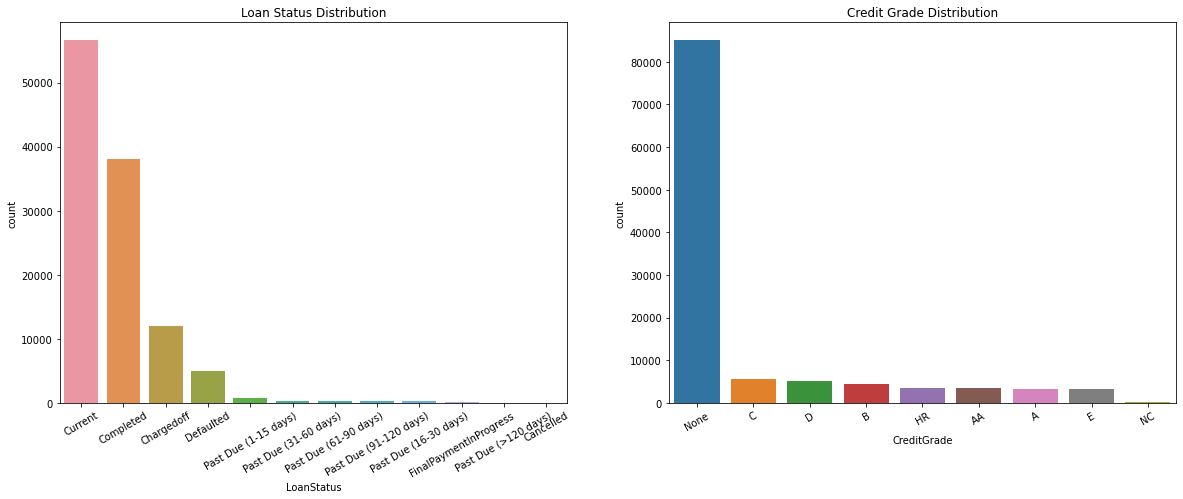

In [23]:
# plotting the credit grade and loan status distribution

plt.figure(figsize = [20, 7])

plt.subplot(1,2,1)
freq = newdf['LoanStatus'].value_counts()
order = freq.index

g = sns.countplot(data = newdf, x = 'LoanStatus', order = order)
plt.title('Loan Status Distribution')
plt.xticks(rotation=30);


plt.subplot(1,2,2)
freq2 = newdf['CreditGrade'].value_counts()
order2 = freq2.index

g = sns.countplot(data = newdf, x = 'CreditGrade', order = order2)
plt.title('Credit Grade Distribution')
plt.xticks(rotation=30);

LoanStatus is skewed as we can see lots of the data point are Current while CreditGrade has lots of null values with the all grade having less than 10,000 total values.

In [24]:
newdf.describe()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating_numeric,ProsperScore,ListingCategory_numeric,EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,MonthlyLoanPayment,LoanCurrentDaysDelinquent
count,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,1.139120e+05,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000,113912.000000
mean,40.831308,0.218828,0.192786,0.182723,0.125636,0.059820,0.071561,3.033412,4.432202,2.774817,89.661862,0.255267,5.606973e+03,0.275520,152.850077,2.421018,31.882067,8338.015661,272.511490,152.850077
std,10.437112,0.080364,0.074809,0.074506,0.094327,0.053427,0.049420,2.288386,3.306742,3.997024,94.370158,0.535652,7.478338e+03,0.654833,466.365926,6.752374,29.960783,6245.940592,192.697031,466.365926
min,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.000000,-0.182700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000
25%,36.000000,0.156290,0.134000,0.124500,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,0.130000,3.200000e+03,0.000000,0.000000,0.000000,6.000000,4000.000000,131.685000,0.000000
50%,36.000000,0.209760,0.184000,0.173000,0.131700,0.052400,0.079900,3.000000,5.000000,1.000000,60.000000,0.210000,4.666667e+03,0.000000,0.000000,0.000000,21.000000,6500.000000,217.740000,0.000000
75%,36.000000,0.283810,0.250000,0.240000,0.195200,0.097500,0.108700,5.000000,7.000000,3.000000,130.000000,0.310000,6.817083e+03,0.000000,0.000000,0.000000,65.000000,12000.000000,371.580000,0.000000
max,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,20.000000,755.000000,10.010000,1.750003e+06,8.000000,2704.000000,44.000000,98.000000,35000.000000,2251.510000,2704.000000


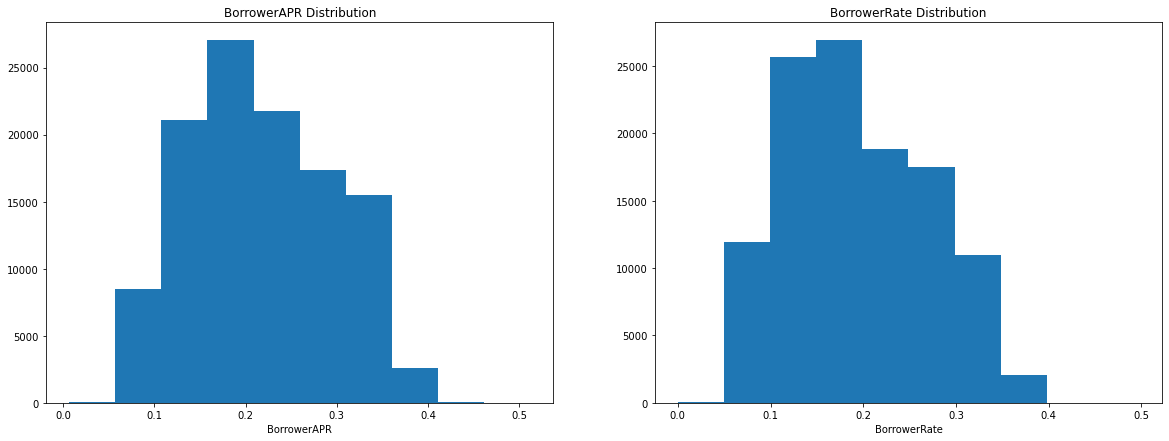

In [25]:
plt.figure(figsize = [20, 7]) 

plt.subplot(1, 2, 1)
plt.hist(data = newdf, x = 'BorrowerAPR')
plt.title('BorrowerAPR Distribution')
plt.xlabel('BorrowerAPR');

plt.subplot(1, 2, 2)
plt.hist(data = newdf, x = 'BorrowerRate')
plt.title('BorrowerRate Distribution')
plt.xlabel('BorrowerRate');

Distribution of BorrowerAPR and BorrowerRate. Both BorrowerAPR and BorrowerRate seem to be normally distributed, though a little left-skewed which could be ignored for the purpose of this analysis.

Text(0.5, 0, 'ProsperScore')

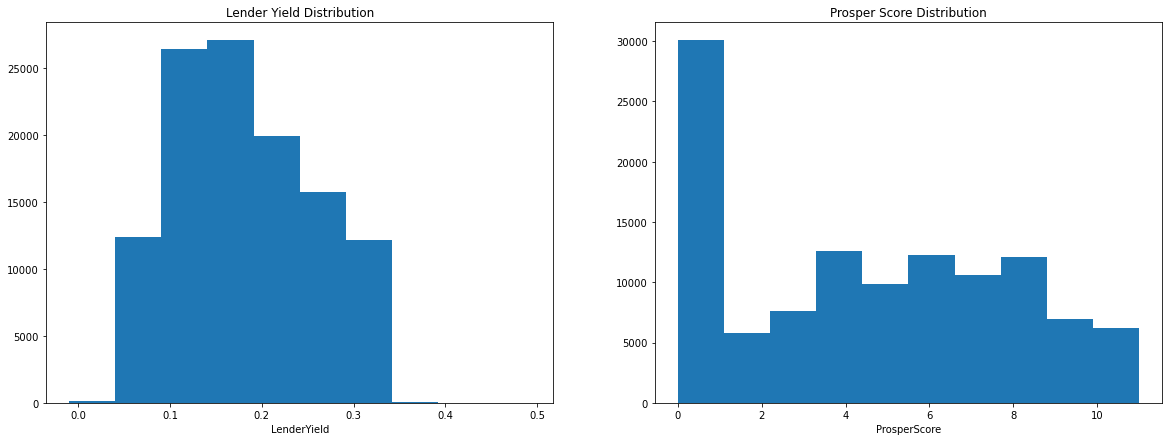

In [26]:
plt.figure(figsize=(20,7))
           
plt.subplot(1,2,1)
plt.hist(data = newdf,x = 'LenderYield')
plt.title('Lender Yield Distribution')
plt.xlabel('LenderYield');
           
plt.subplot(1,2,2)
plt.hist(data = newdf,x = 'ProsperScore')
plt.title('Prosper Score Distribution')
plt.xlabel('ProsperScore')

Distribution of LenderYield and ProsperScore. LenderYield seem to be normally distributed, though a little left-skewed which could also be ignored for the purpose of this analysis. ProsperScore seem flat with a little spike on the left.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- The features were all normal but a bit rigth skewed. Prosper score however has a spike point at the left.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- The prosperscore has a left spike in it. There isn't any outlier showing from here.

#### What does the relationship between the 2 quantitative variables: BorrowerAPR and LenderYield look like? Are they correlated?

Text(0.5, 1.0, 'BorrowerAPR vs LenderYield')

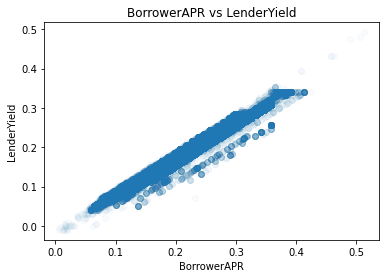

In [27]:
# Checking the relationship between BorrowerAPR and LenderYield

plt.scatter(data = newdf, x = 'BorrowerAPR', y = 'LenderYield',alpha = 1/40);
plt.xlabel('BorrowerAPR')
plt.ylabel('LenderYield')
plt.title('BorrowerAPR vs LenderYield')

The above chart shows the relationship between the BorrowerAPR and LenderYield. This significantly shows a linear relationship between the Interest rate and the Annual Percentage Rate.

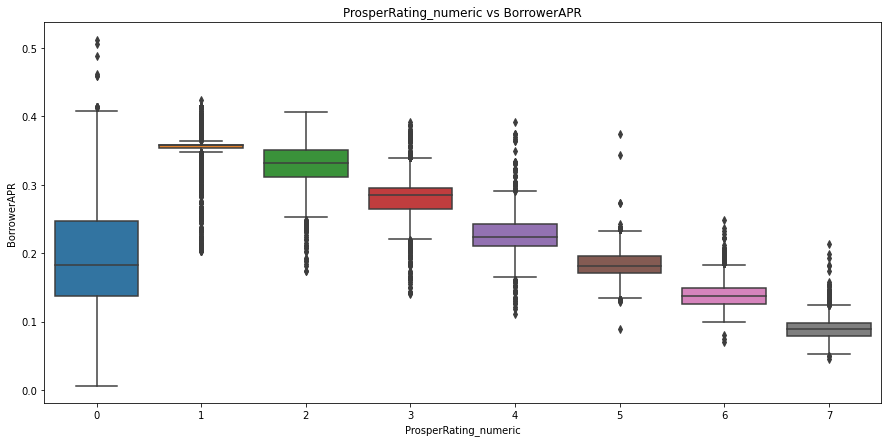

In [28]:
plt.figure(figsize = [15, 7])
sns.boxplot(data = newdf, x = 'ProsperRating_numeric', y = 'BorrowerAPR')
plt.xlabel('ProsperRating_numeric')
plt.ylabel('BorrowerAPR')
plt.title('ProsperRating_numeric vs BorrowerAPR');

The boxplot above shows how the APR is distributed for the different Prosper ratings. We can see a relatively high APR for ratings 1 and 2 and downward slope afterwards.

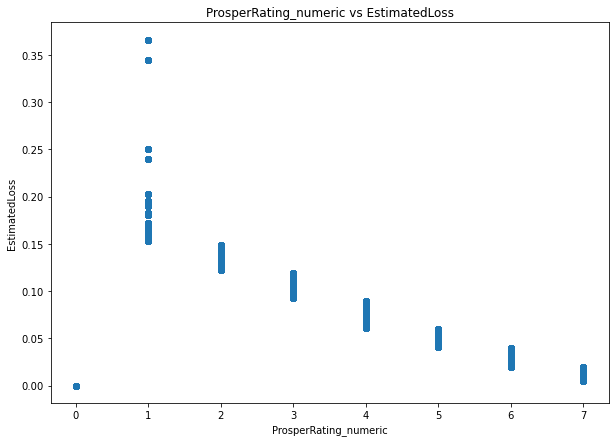

In [29]:
plt.figure(figsize = [10, 7])
sns.regplot(data = newdf, x = 'ProsperRating_numeric', y = 'EstimatedLoss',  fit_reg=False)
plt.xlabel('ProsperRating_numeric')
plt.ylabel('EstimatedLoss')
plt.title('ProsperRating_numeric vs EstimatedLoss');

This regplot shows that the Rating is inversly proportional to the Estimated loss i.e, As the rating increases the Estimated loss is decreasing.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The relationship between the variables checked above all seem linear trending forward except for Prosper rating and Estimated loss which is linear but in opposite direction and also shows a lot of EstimatedLoss for rating 1. Also Prosper rating and BorrowerAPR does not show a linear relationship.

In [30]:
newdf.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

In [31]:
newdf.LoanStatus = newdf.LoanStatus.str.replace('(', '')
newdf.LoanStatus = newdf.LoanStatus.str.replace(')', '')

In [32]:
newdf.LoanStatus.value_counts()

Current                   56576
Completed                 38049
Chargedoff                11992
Defaulted                  5018
Past Due 1-15 days          806
Past Due 31-60 days         363
Past Due 61-90 days         313
Past Due 91-120 days        304
Past Due 16-30 days         265
FinalPaymentInProgress      205
Past Due >120 days           16
Cancelled                     5
Name: LoanStatus, dtype: int64

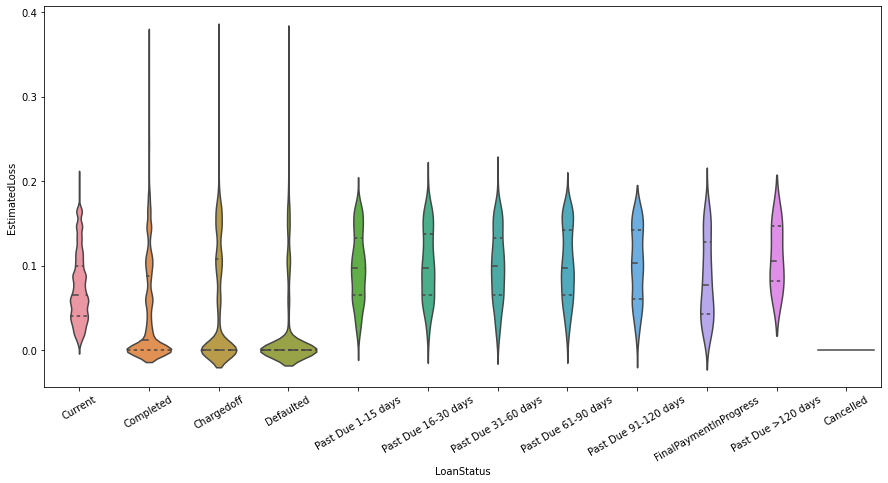

In [33]:
Loan_status = ['Current', 'Completed', 'Chargedoff', 'Defaulted', 'Past Due 1-15 days', 'Past Due 16-30 days', 'Past Due 31-60 days', 'Past Due 61-90 days','Past Due 91-120 days','FinalPaymentInProgress','Past Due >120 days','Cancelled']

loan_classes = pd.api.types.CategoricalDtype(ordered=False, categories=Loan_status)

newdf['LoanStatus'] = newdf['LoanStatus'].astype(loan_classes)

plt.figure(figsize = [15, 7]) 

ax = sns.violinplot(data=newdf, x='LoanStatus', y='EstimatedLoss',inner='quartile')
plt.xticks(rotation=30);

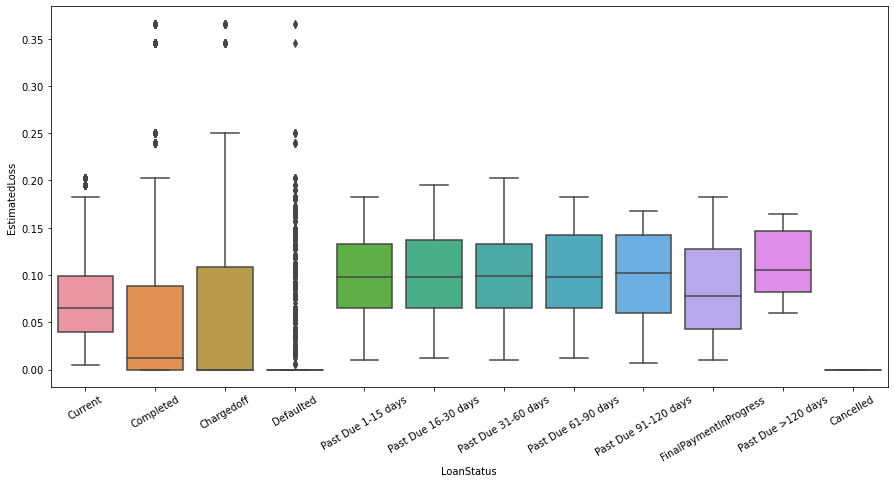

In [34]:
plt.figure(figsize = [15, 7])
sns.boxplot(data=newdf, x='LoanStatus', y='EstimatedLoss')
plt.xticks(rotation=30);

From the above, we can see how the EstimatedLoss is distributed across the different loan status. We see low loss for loans Current, Completed and Chargedoff with a high spike for Defaulted loans.

#### What does the relationship between the 2 variables: BorrowerAPR and LoanOriginationQuarter show?

(-0.043523144368672856, 0.4068456783297078)

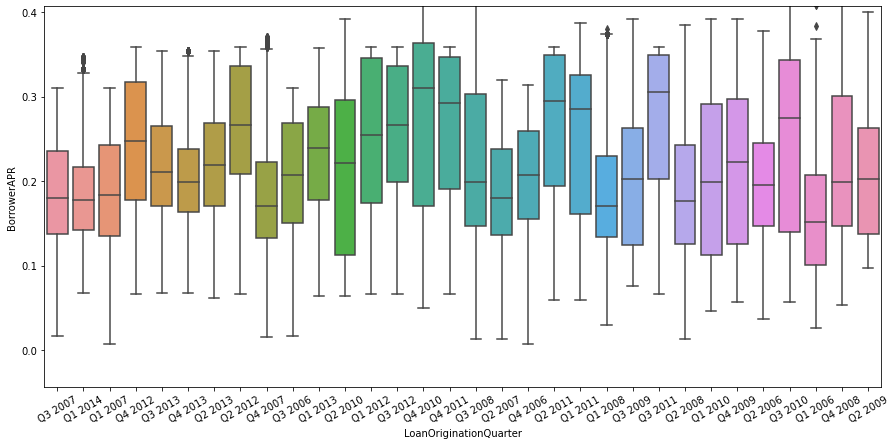

In [35]:
plt.figure(figsize = [15, 7])
sns.boxplot(data=newdf, x='LoanOriginationQuarter', y='BorrowerAPR')
plt.xticks(rotation=30);
plt.ylim(ax.get_ylim())

From the chart above, Most Q2 and Q4 seem to be having higher APR.

In [36]:
newdf.BorrowerState.unique()

array(['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'NA', 'AL', 'AZ',
       'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
       'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
       'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
       'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'], dtype=object)

#### What does the relationship between the 2 variables: BorrowerAPR and BorrowerState show?

(-0.043523144368672856, 0.4068456783297078)

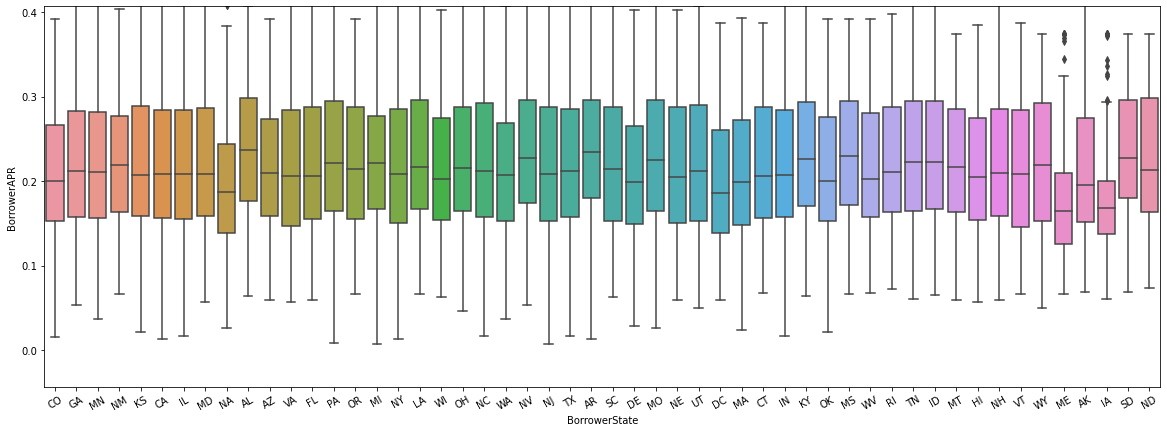

In [37]:
plt.figure(figsize = [20, 7])
sns.boxplot(data=newdf, x='BorrowerState', y='BorrowerAPR')
plt.xticks(rotation=30);
plt.ylim(ax.get_ylim())

From the oabive chart, Most states shows similar APR except for AL with slightly higher APR and ME with slightly lower APR.

#### Show the relationship between Occupation and BorrowerAPR

<AxesSubplot:xlabel='BorrowerAPR', ylabel='Occupation'>

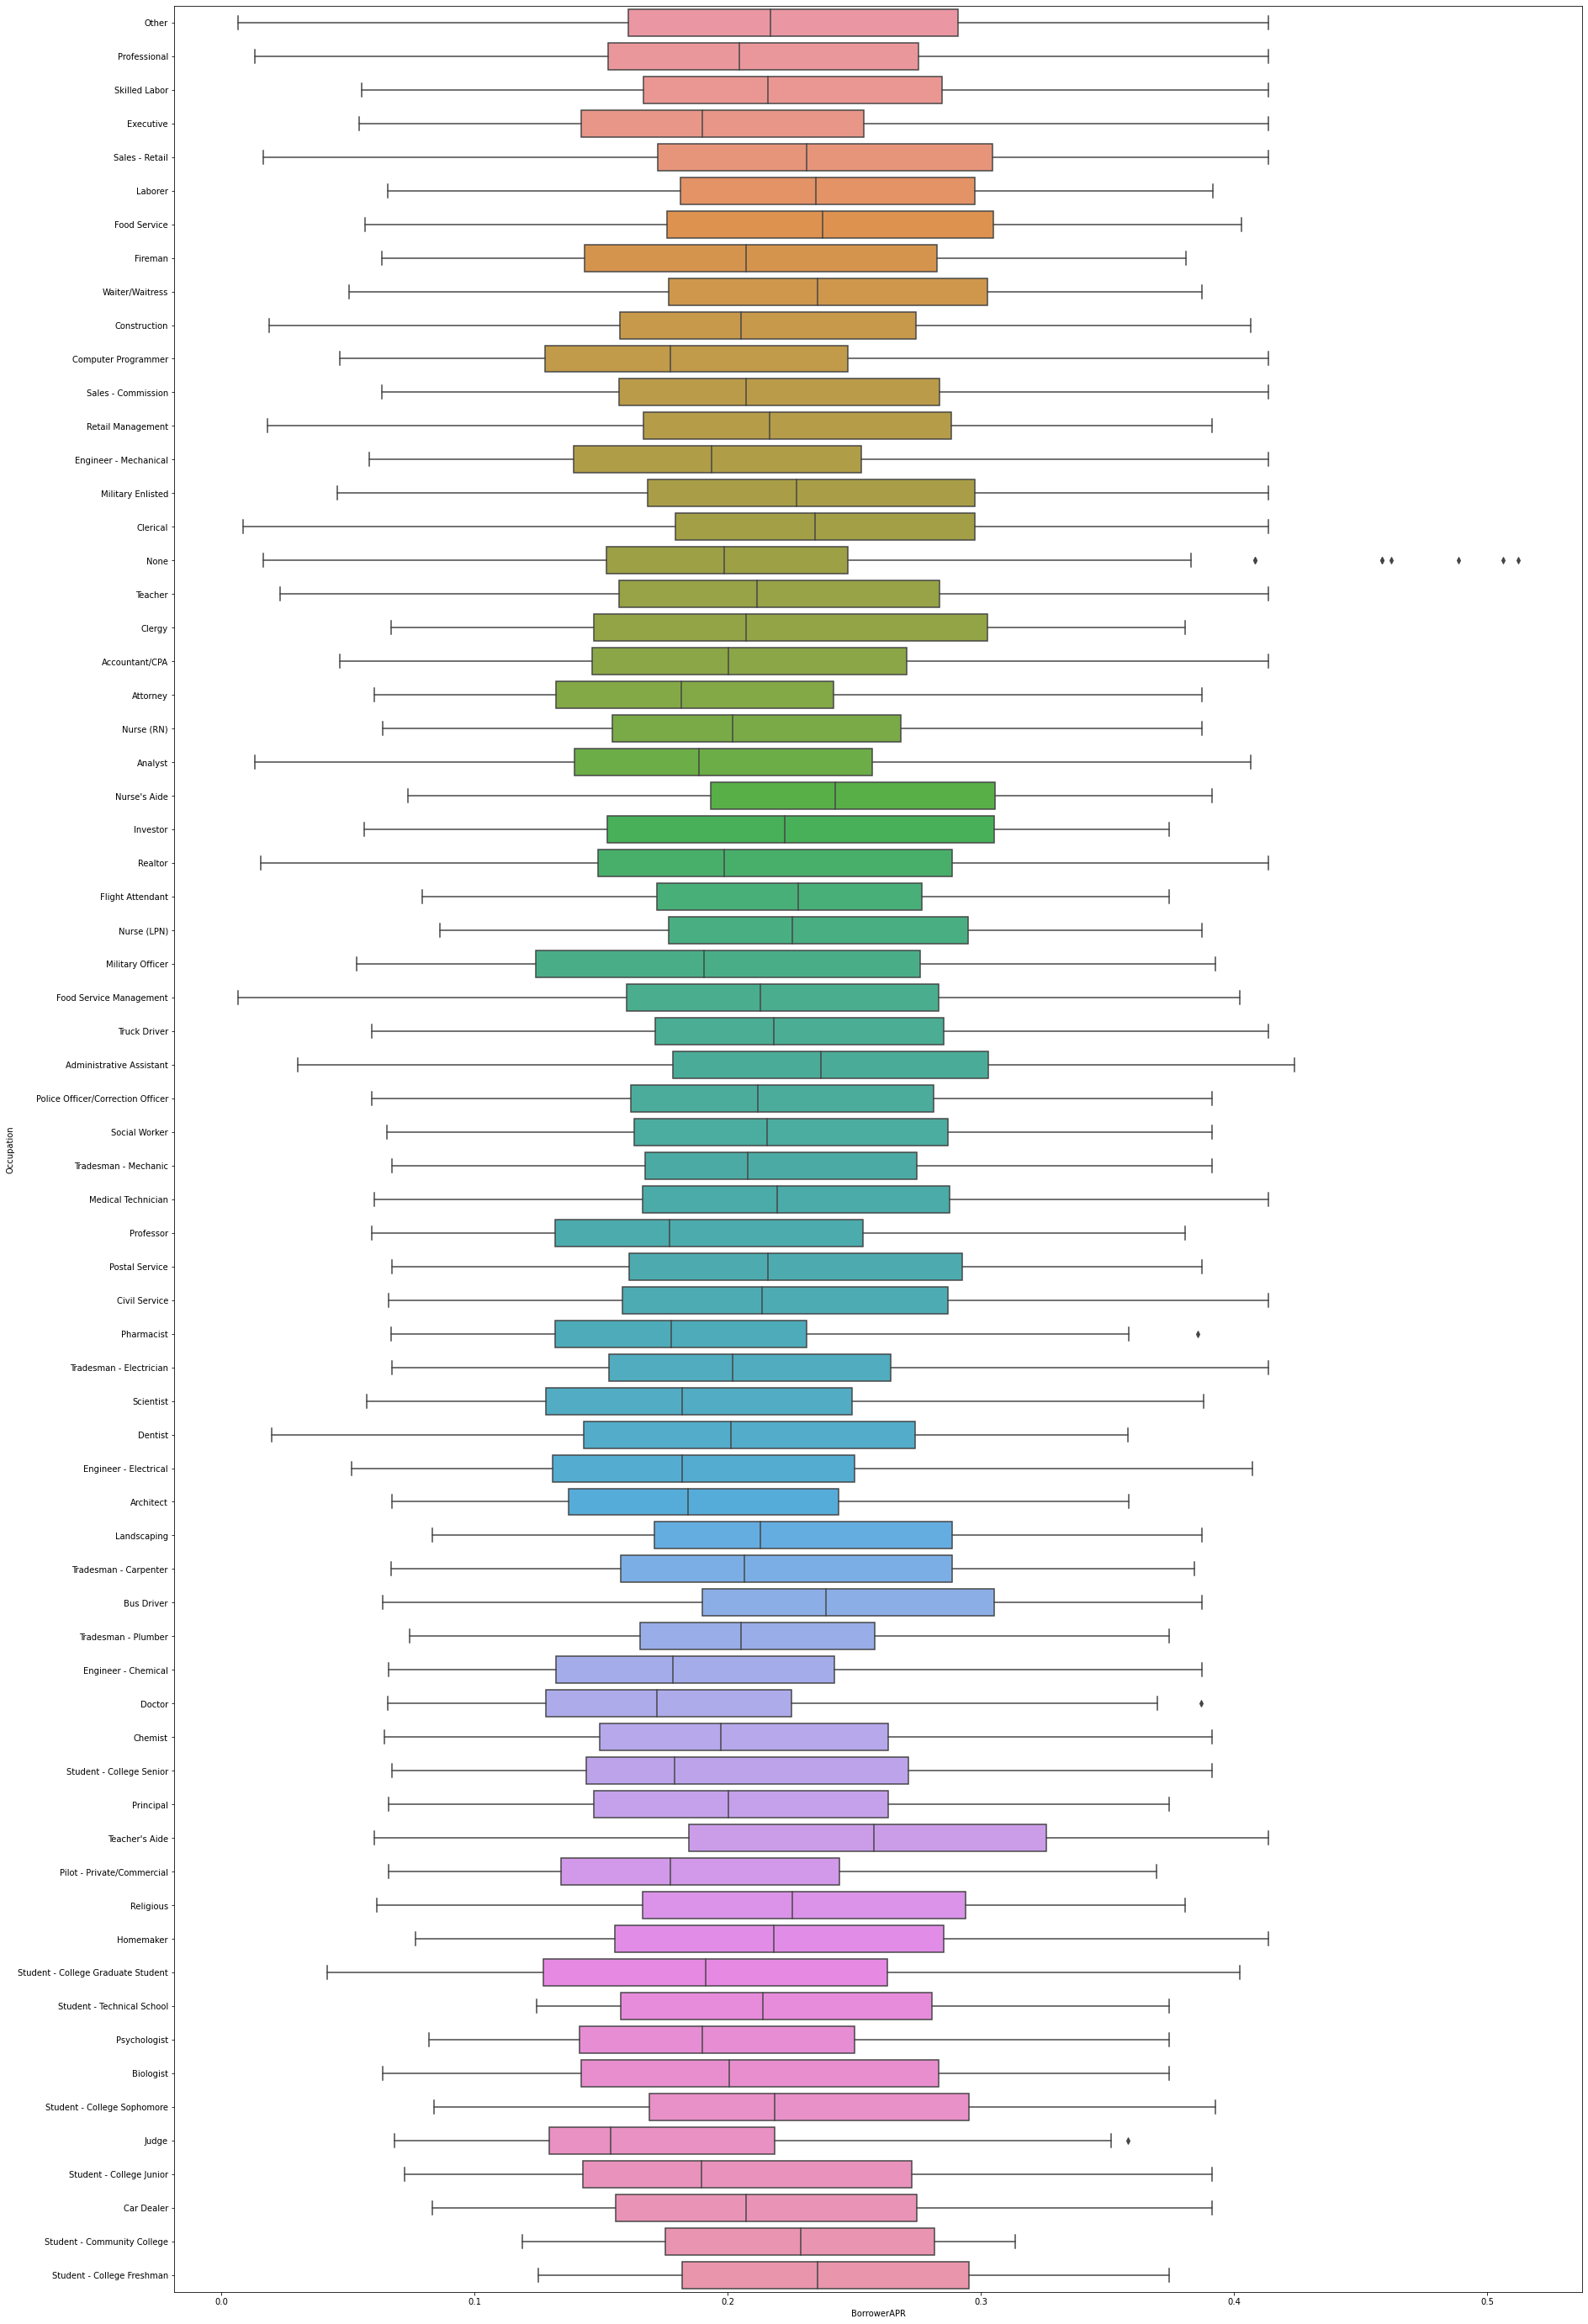

In [38]:
plt.figure(figsize = [30, 50])
sns.boxplot(data=newdf, y='Occupation', x = 'BorrowerAPR')

### Multivariate Exploration

#### What does the relationship between the 3 variables: LoanStatus, EstimatedLoss, and ProsperRating_numeric look like?

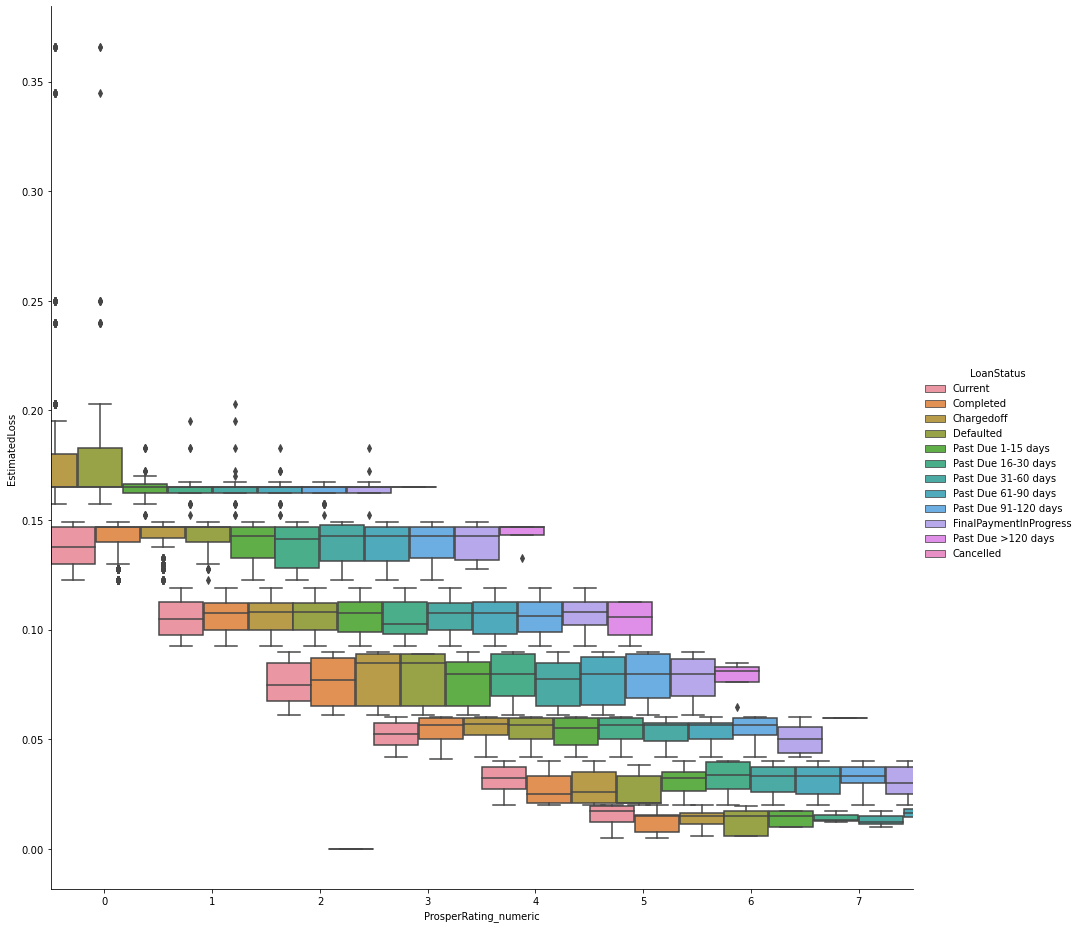

In [39]:
sns.catplot(data=newdf, y='EstimatedLoss', x='ProsperRating_numeric', 
               hue='LoanStatus', kind='box', height=13, width = 5, legend=True);

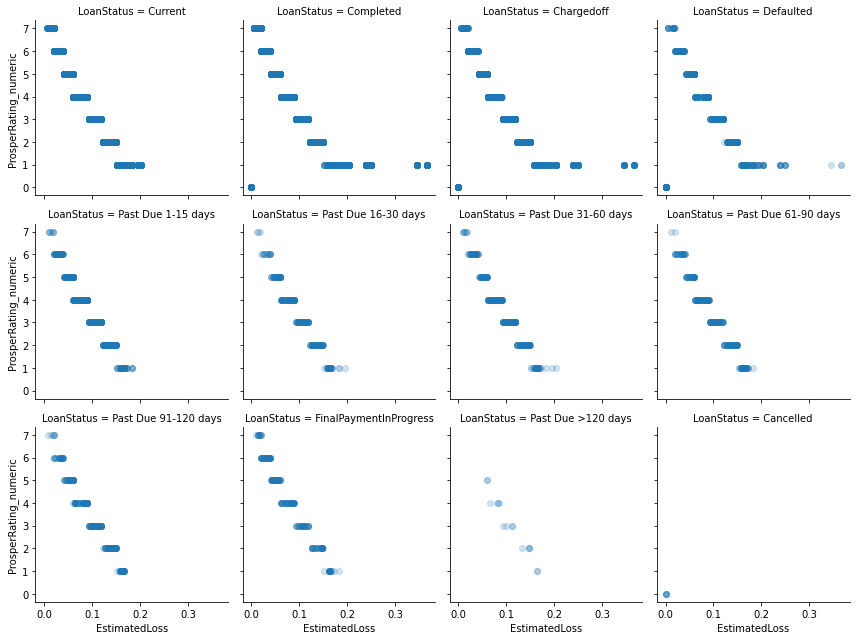

In [40]:
g = sns.FacetGrid(data = newdf, col = 'LoanStatus', height = 3, col_wrap = 4)
g.map(plt.scatter, 'EstimatedLoss', 'ProsperRating_numeric', alpha = 1/5)

We can see a linear negative relationship between Prosper rating an estimated loss for the different categories of LoanStatus. They have a trend of low Estimated losses for the high ratings. However for loans that are past due 120 days or cancelled shows a slightly different partten.

In [44]:
newdf.LoanOriginalAmount.nunique()

2467

#### What does the relationship between the 3 variables: LoanStatus, LoanOriginalAmount, and CreditGrade look like?

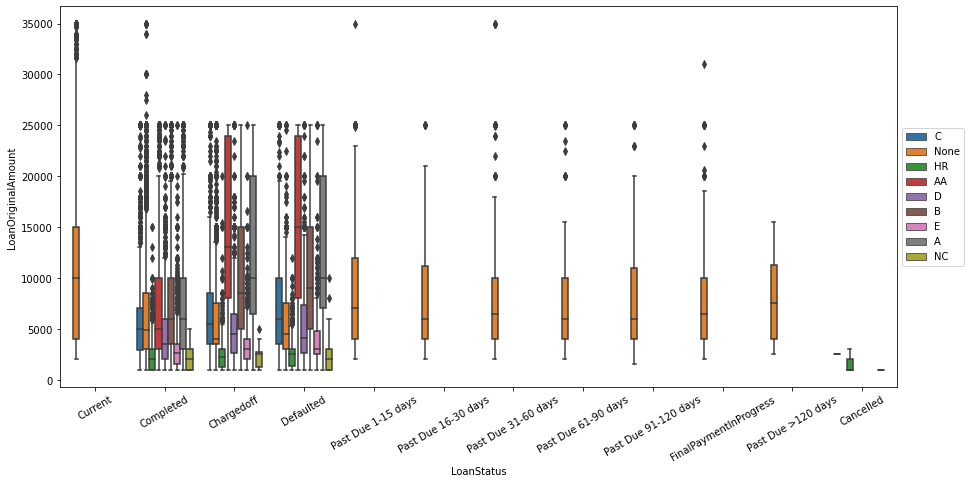

In [41]:
plt.figure(figsize = [15, 7])
sns.boxplot(data = newdf, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'CreditGrade')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 30);

Removing None from CreditGrade and ploting again

In [47]:
newdf2 = newdf.copy()

newdf2 = newdf[newdf['CreditGrade'] != 'None']
newdf2.CreditGrade.value_counts()

C     5646
D     5152
B     4387
HR    3506
AA    3495
A     3314
E     3288
NC     140
Name: CreditGrade, dtype: int64

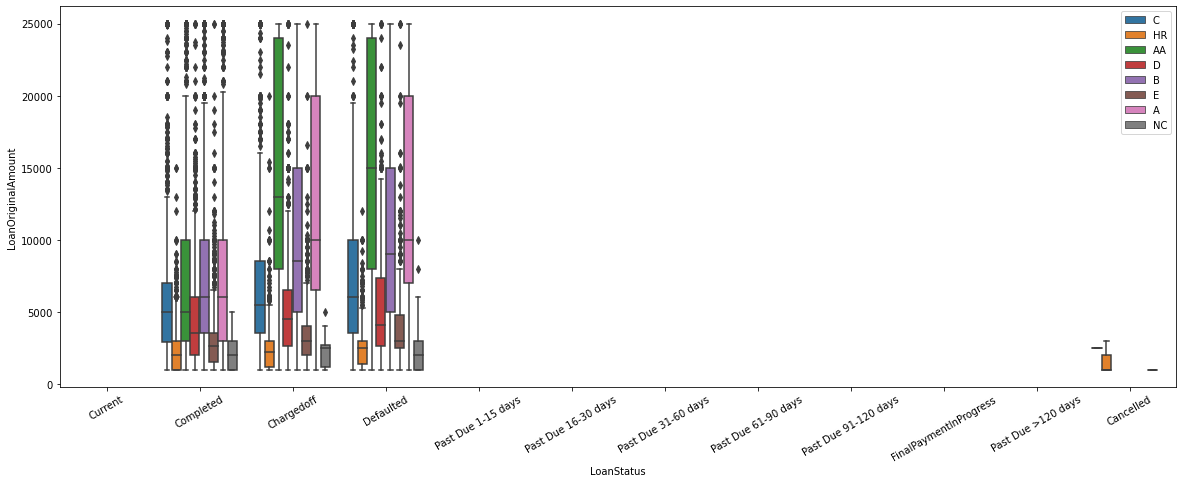

In [50]:
plt.figure(figsize = [20, 7])
sns.boxplot(data = newdf2, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'CreditGrade')
plt.legend() 
plt.xticks(rotation = 30);

#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Most relationships between ProsperRating and EstimatedLoss are negatively linear for all LoanStaus.

#### Were there any interesting or surprising interactions between features?

The realtionship between LoanStatus and LoanOriginalAmount are skewed between Comnpleted, Chargedoff and Defaulted loans for most CreditGrades. Loans that have defaulted past a day does not show mapping of data Cancelled loans which shows lots of HR credit grade.

## Conclusions

Lots of the relationships between variables here are shown to be linear. Also these variables are mostly normally distributed with a few slightly skewed. This shows a very balanced relationship between borrowers and their attributes and their lending characteristics.